In [30]:
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(style='darkgrid', context='notebook')
from matplotlib import pyplot as plt
from figures.plotting import plot_metrics_trend

In [69]:
pooling = False

data = pd.read_csv(f'../results/gcl_manifolds|pooling:{pooling}.csv')
data[r'inter-$D^{-1}$'] = 1 / data['between-concept dimensionality']
data[r'intra-$D^{-1}$'] = 1 / data['within-concept dimensionality (mean)']

metric_columns = ['between-concept radius', 'within-concept radius (mean)', 'between-concept dimensionality', 'within-concept dimensionality (mean)', 
                  'signal (mean)', 'bias (mean)', 'other signal-noise-overlap (mean)', 'self signal-noise-overlap (mean)', 'signal-noise-ratio (mean)', 
                  r'inter-$D^{-1}$', r'intra-$D^{-1}$']
metric_label_map = {'between-concept dimensionality': 'inter-dim', 'between-concept radius': 'inter-radius', 
                    'bias (mean)': 'bias', 'signal (mean)': 'signal', 'signal-noise-ratio (mean)': 'snr', 
                    'other signal-noise-overlap (mean)': 'other-sno', 'self signal-noise-overlap (mean)': 'self-sno', 
                    'within-concept dimensionality (mean)': 'intra-dim', 'within-concept radius (mean)': 'intra-radius', 
                    r'inter-$D^{-1}$': r'inter-$D^{-1}$', r'intra-$D^{-1}$': r'intra-$D^{-1}$'}
metric_columns = [metric_label_map[m] for m in metric_columns]
data = data.rename(columns=metric_label_map)

metric_stds = [c for c in data.columns if '(std)' in c]
data = data.drop(columns=metric_stds)

data = data.melt(id_vars=[c for c in data.columns if c not in metric_columns], 
                 value_vars=metric_columns, var_name='metric', value_name='metric_value')

data.head()

,layer,architecture,task,kind,source,metric,metric_value
0,conv1,ResNet50 (gcl),Object Classification,Supervised,PyTorch,inter-radius,21.896942
1,bn1,ResNet50 (gcl),Object Classification,Supervised,PyTorch,inter-radius,3.916120
2,relu,ResNet50 (gcl),Object Classification,Supervised,PyTorch,inter-radius,2.845401
3,maxpool,ResNet50 (gcl),Object Classification,Supervised,PyTorch,inter-radius,2.085378
4,layer1.0.relu,ResNet50 (gcl),Object Classification,Supervised,PyTorch,inter-radius,1.872583


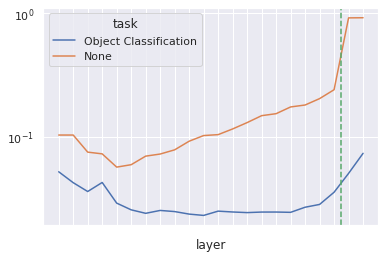

In [96]:
results = data[data.metric == r'intra-$D^{-1}$']

ax = sns.lineplot(data=results, x='layer', y='metric_value', hue='task')
ax.axvline(19.5, color='g', linestyle='--')
ax.set(xticklabels=[], ylabel=None, yscale='log')
plt.show()

# Compare with- and without pooling

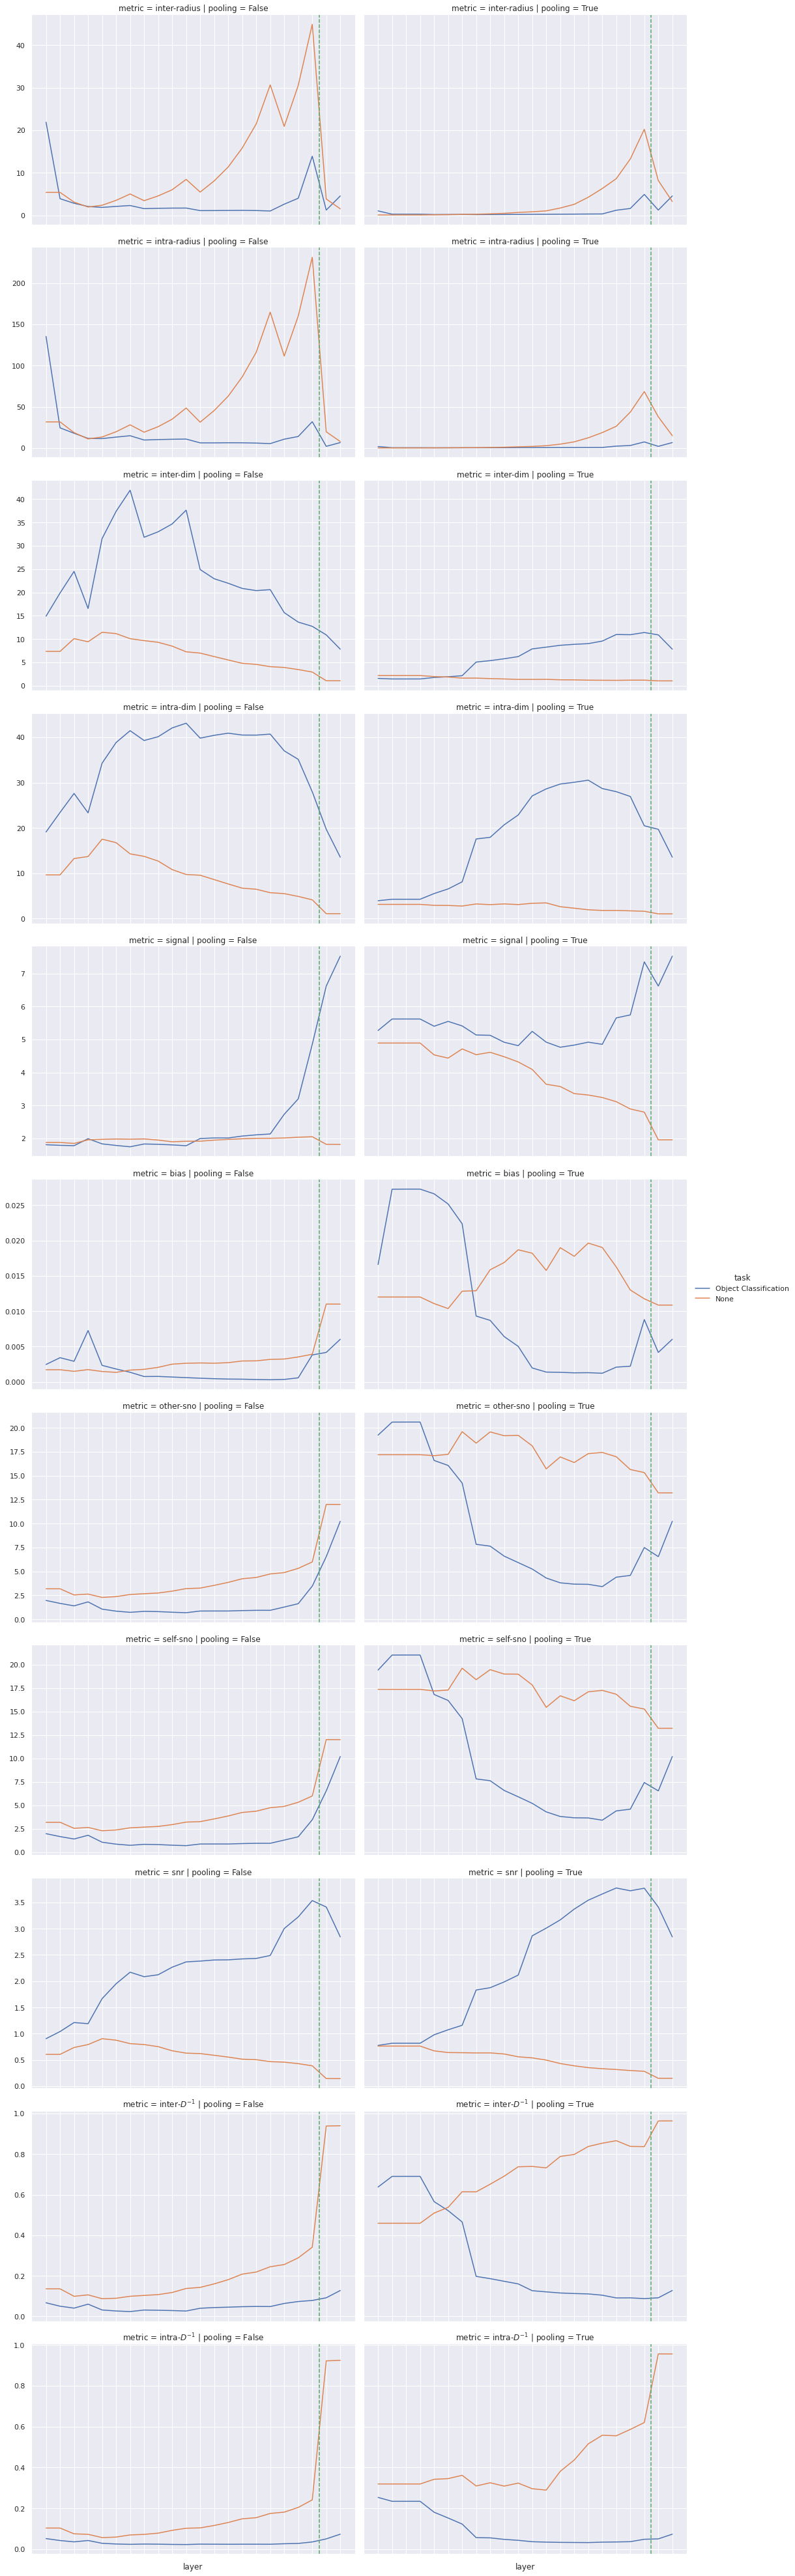

In [104]:
data_pooling = pd.read_csv(f'../results/gcl_manifolds|pooling:True.csv')
data_nopooling = pd.read_csv(f'../results/gcl_manifolds|pooling:False.csv')
data_pooling[r'inter-$D^{-1}$'] = 1 / data_pooling['between-concept dimensionality']
data_pooling[r'intra-$D^{-1}$'] = 1 / data_pooling['within-concept dimensionality (mean)']
data_nopooling[r'inter-$D^{-1}$'] = 1 / data_nopooling['between-concept dimensionality']
data_nopooling[r'intra-$D^{-1}$'] = 1 / data_nopooling['within-concept dimensionality (mean)']

data_pooling = data_pooling.rename(columns=metric_label_map)
data_nopooling = data_nopooling.rename(columns=metric_label_map)

data_pooling = data_pooling.drop(columns=metric_stds)
data_nopooling = data_nopooling.drop(columns=metric_stds)

data_pooling = data_pooling.melt(id_vars=[c for c in data_pooling.columns if c not in metric_columns], 
                                 value_vars=metric_columns, var_name='metric', value_name='metric_value')
data_nopooling = data_nopooling.melt(id_vars=[c for c in data_nopooling.columns if c not in metric_columns], 
                                     value_vars=metric_columns, var_name='metric', value_name='metric_value')

data_pooling = data_pooling.assign(pooling=True)
data_nopooling = data_nopooling.assign(pooling=False)
results = pd.concat([data_pooling, data_nopooling])

g = sns.relplot(kind='line', data=results, x='layer', y='metric_value', hue='task', col='pooling', row='metric',
                facet_kws={'sharey': 'row'}, height=5, aspect=1.5)
for ax in g.axes.flatten():
    ax.axvline(19.5, color='g', linestyle='--')
    ax.set(xticklabels=[], ylabel=None)
plt.savefig('/home/eelmozn1/Downloads/pooling_vs_nopooling.jpg')
plt.show()